
<div style="border: 2px solid #2c3e50; padding: 10px; background-color: #ecf0f1; text-align: center; border-radius: 10px;">

# **Multiple Linear Regression**

## **Pavithra**

</div>


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm


In [52]:
df_index=pd.read_csv(r"C:\Users\pavit\Downloads\auto-mpg.csv")
df_index

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [54]:
# Handle missing values and data cleaning

#check null values
df_index.isnull().sum()

# Convert 'horsepower' to numeric
df_index['horsepower'] = pd.to_numeric(df_index['horsepower'], errors='coerce')
df_index.dropna(inplace=True)  # Drop rows with NaN values

# Drop the 'car_name' column since it's not useful for prediction
df_index.drop(columns=['car name'], inplace=True)

# Step 4: Standardize the features
features = ['horsepower', 'weight', 'displacement']
X = df_index[features]
y = df_index['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [44]:
#Build the Multiple Linear Regression Model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Evaluate the model using R-squared and adjusted R-squared
y_pred = regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


R-squared: 0.6599244793845134
Adjusted R-squared: 0.649071005322317


In [45]:
print(regression.coef_)
print(regression.intercept_)

[-1.64356076 -4.19959092 -1.14072052]
23.6921768707483


In [46]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)
np.mean(validation_score)

-18.75443661382541

In [47]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

17.151066902942947
3.4017534009359616
4.141384660103785


Text(0, 0.5, 'mpg')

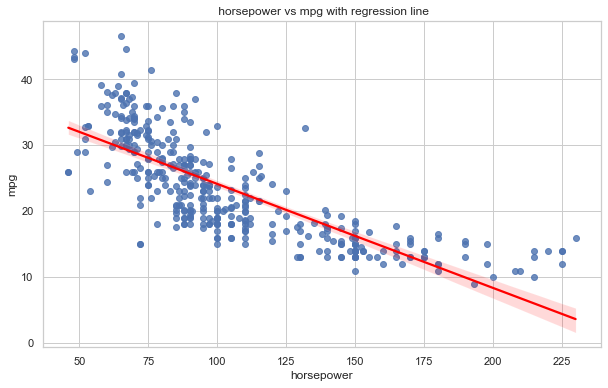

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x='horsepower',y='mpg',data=df_index,line_kws={"color":"red"})
plt.title(" horsepower vs mpg with regression line")
plt.xlabel("horsepower")
plt.ylabel("mpg")

In [51]:
#Feature Selection (Backward Elimination using Statsmodels)
X_train_sm = sm.add_constant(X_train)  # Adding constant for intercept
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

# Based on p-values, we can manually eliminate features (if necessary) from 'X_train' and 'X_test'
# and refit the model for further optimization if needed. Final feature selection can be done if p-values for any variables are greater than 0.05.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           9.83e-79
Time:                        18:15:13   Log-Likelihood:                -843.86
No. Observations:                 294   AIC:                             1696.
Df Residuals:                     290   BIC:                             1710.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6922      0.251     94.513      0.0